#  Feature Engineering and Data Pre-Processing

## Outliers

An observation that differs abnormally from other values in a population-based random sample is referred to as an outlier.

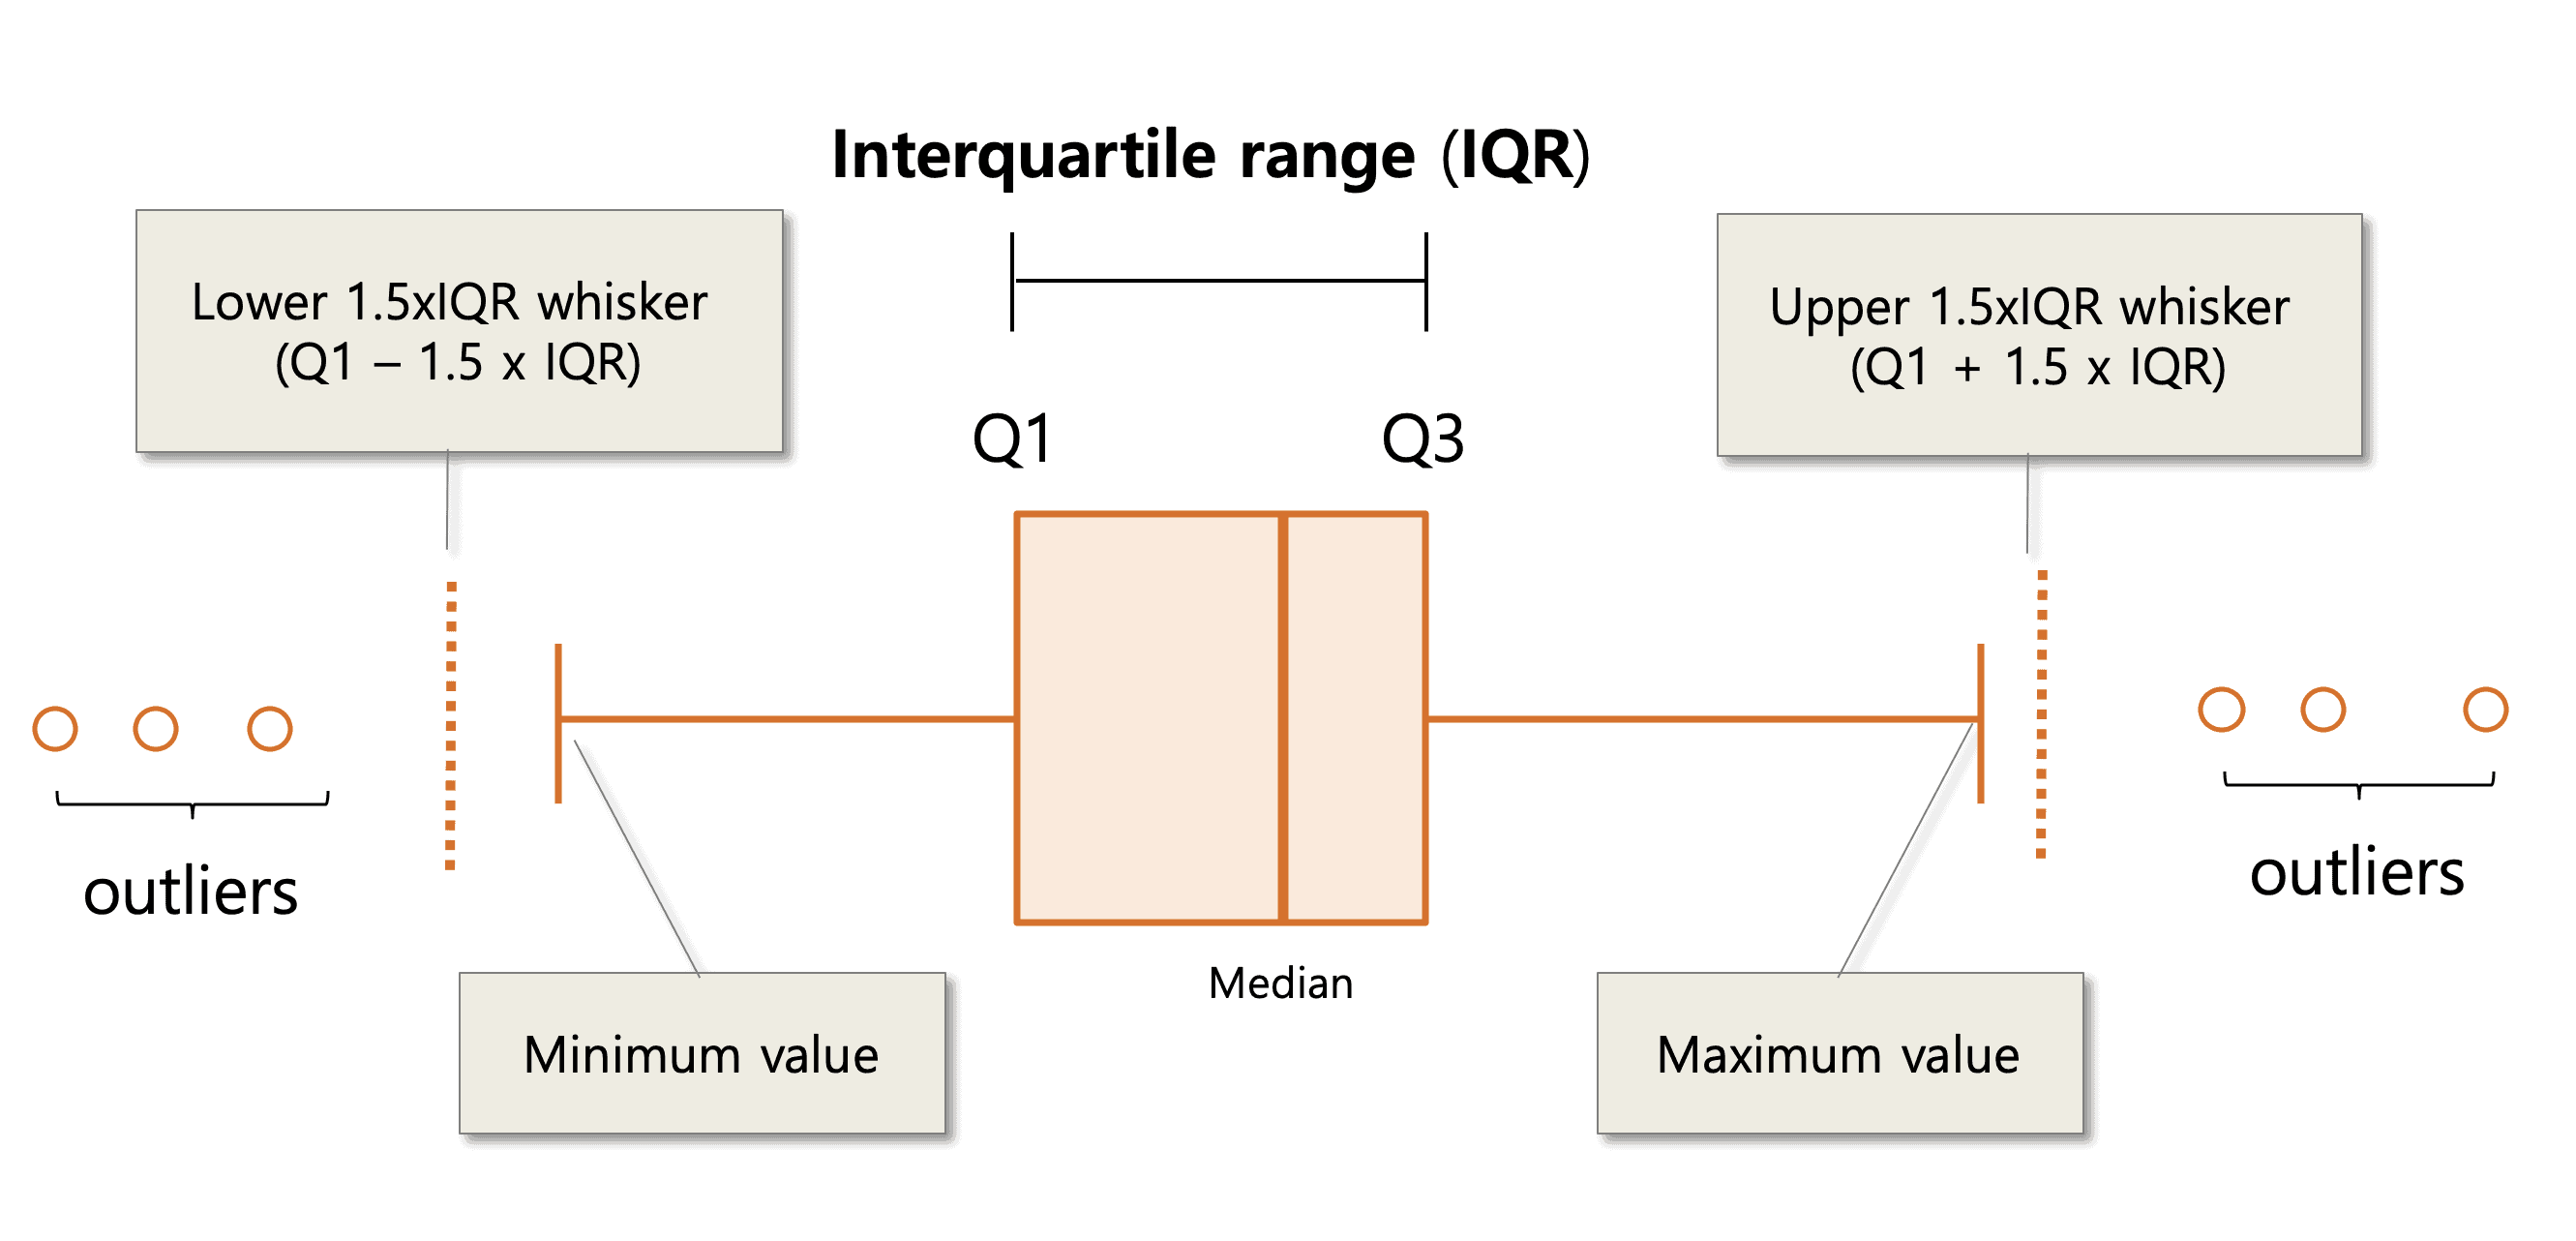

In [83]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)})

In [2]:
def load_application_train():
    
    data = pd.read_csv("datas/application_train.csv")
    return data


def load_titanic_data():
    
    data = pd.read_csv("datas/titanic.csv")
    return data

In [3]:
data_app = load_application_train()
data_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df = load_titanic_data()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Detecting Outliers

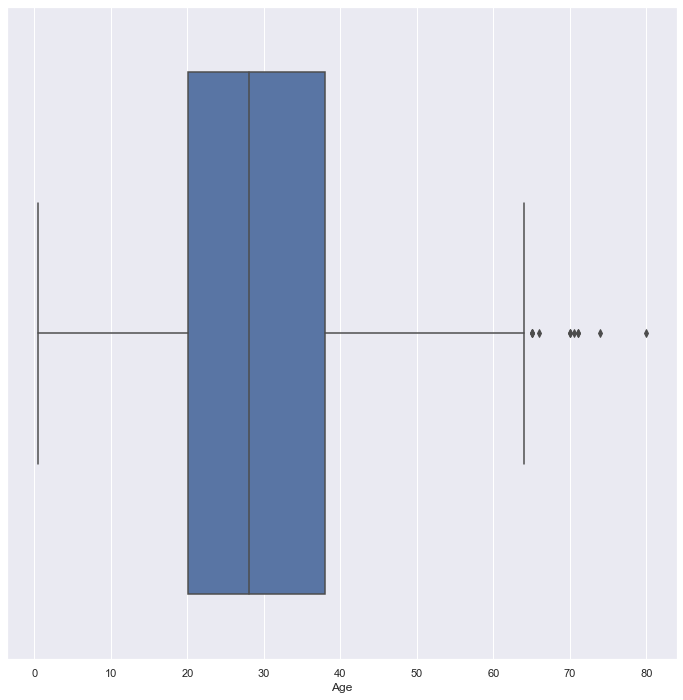

In [5]:
# boxplot represents the distribution information of a variable
sns.boxplot(x=df["Age"]);

In [6]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
print(q1,q3)
print("IQR: ",iqr)

low = q1 - 1.5* iqr
up = q3 + 1.5* iqr
print("Low: ",low)
print("Up: ",up)

20.125 38.0
IQR:  17.875
Low:  -6.6875
Up:  64.8125


In [7]:
df[(df["Age"] < low) | (df["Age"] > up)] # outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [8]:
df[df["Age"] < low].any(axis=None)

False

### Functionalizing the Outlier Detection

In [9]:
def outlier_threshold(dataframe, column_name, q1=0.25, q3=0.75):
    
    quartile1 = dataframe[column_name].quantile(q1)
    quartile3 = dataframe[column_name].quantile(q3)
    iqr = quartile3 - quartile1

    low_limit = quartile1 - 1.5* iqr
    up_limit = quartile3 + 1.5* iqr    
    
    return low_limit,up_limit

In [10]:
low_limit, up_limit = outlier_threshold(df,"Age")
print(low_limit,up_limit)

-6.6875 64.8125


In [11]:
low_limit, up_limit = outlier_threshold(df,"Fare")
print(low_limit,up_limit)

-26.724 65.6344


In [12]:
def check_outliers(dataframe,column_name):
    
    low_limit, up_limit = outlier_threshold(dataframe,column_name)
    
    if dataframe[(dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [13]:
check_outliers(df,"Age")

True

In [14]:
check_outliers(df,"Fare")

True

In [15]:
def grab_column_names(dataframe,cat_threshold = 10, car_threshold=20):
    
    '''
    This function gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.
    
    dataframe: dataframe
            the dataframe for which variable names are to be retrieved.
    cat_threshold: int, optional
            class threshold for numeric but categorical variables.
    car_threshold: int, optional
            class threshold for categorical but cardinal variables.
    '''
    
    cat_columns = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat_columns = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and
                          dataframe[col].dtypes != 'O']
    
    cat_but_car_columns = [col for col in dataframe.columns if dataframe[col].nunique() > car_threshold and
                          dataframe[col].dtypes == 'O']
    
    cat_columns = cat_columns + num_but_cat_columns
    cat_columns = [col for col in cat_columns if col not in cat_but_car_columns]
    
    
    num_columns = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_columns = [col for col in num_columns if col not in num_but_cat_columns]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Length of categorical data: {len(cat_columns)}")
    print(f"Length of numerical data: {len(num_columns)}")
    print(f"Length of cardinal data: {len(cat_but_car_columns)}")
    print(f"Length of numerical but categorical data: {len(num_but_cat_columns)}")
    
    return cat_columns,num_columns,cat_but_car_columns

In [16]:
cat_columns,num_columns,cat_but_car_columns = grab_column_names(df)

Observations: 891
Variables: 12
Length of categorical data: 6
Length of numerical data: 3
Length of cardinal data: 3
Length of numerical but categorical data: 4


In [17]:
cat_columns

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [18]:
for col in num_columns:
    print(col,check_outliers(df,col))

PassengerId False
Age True
Fare True


In [19]:
cat_columns_app,num_columns_app,cat_but_car_columns_app = grab_column_names(data_app)
print(cat_columns_app)

Observations: 307511
Variables: 122
Length of categorical data: 54
Length of numerical data: 67
Length of cardinal data: 1
Length of numerical but categorical data: 39
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_

In [20]:
for col in num_columns_app:
    print(col,check_outliers(data_app,col))

SK_ID_CURR False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
B

In [21]:
def extract_outlier(dataframe, column_name, index=False):
    
    low_limit, up_limit = outlier_threshold(dataframe,column_name)
    
    if dataframe[(dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit)].shape[0] > 10:
        print(dataframe[(dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit)].head())
    else:
        print(dataframe[(dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit)])
    
    if index:
        outlier_indexes = dataframe[(dataframe[column_name] < low_limit) | (dataframe[column_name] > up_limit)].index
        
        return outlier_indexes

In [22]:
age_outliers = extract_outlier(df,"Age",True)
age_outliers

     PassengerId  Survived  Pclass                            Name   Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male  66.0      0      0  C.A. 24579  10.5000   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male  65.0      0      1      113509  61.9792   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male  71.0      0      0    PC 17754  34.6542    A5        C
116          117         0       3            Connors, Mr. Patrick  male  70.5      0      0      370369   7.7500   NaN        Q
280          281         0       3                Duane, Mr. Frank  male  65.0      0      0      336439   7.7500   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

## Removing Outliers

In [23]:
def remove_outliers(dataframe,column_name):
    low,up= outlier_threshold(dataframe,column_name)
    df_without_outliers = df[~((df[column_name] < low) | (df[column_name] > up))]
    
    return df_without_outliers

In [24]:
for col in num_columns:
    new_df = remove_outliers(df,col)

In [25]:
df.shape[0] - new_df.shape[0]

116

In [26]:
df[((df["Fare"] < low) | (df["Fare"] > up))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [27]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)),"Fare"]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 118, dtype: float64

## Repressing the Outliers

In [28]:
#df.loc[(df["Fare"] > up),"Fare"] = up# this is an example of repressing
#df.loc[(df["Fare"] > up),"Fare"]

In [29]:
def repressing_outliers(dataframe,column_name):
    low_limit,up_limit = outlier_threshold(dataframe,column_name)
    
    dataframe.loc[(dataframe[column_name] < low),column_name] = low_limit
    dataframe.loc[(dataframe[column_name] > up),column_name] = up_limit
    

In [30]:
for col in num_columns:
    print(col,check_outliers(df,col))

PassengerId False
Age True
Fare True


In [31]:
for col in num_columns:
    repressing_outliers(df,col)

In [32]:
for col in num_columns:
    print(col,check_outliers(df,col))

PassengerId True
Age False
Fare False


# Multivariate Outlier Analysis

A **multivariate outlier** is a combination of unusual scores on at least two variables. Both types of outliers can influence the outcome of statistical analyses. 

## Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [41]:
diamond_df = sns.load_dataset('diamonds')
diamond_df = diamond_df.select_dtypes(include=['float64','int64']) # selecting only numerical columns
diamond_df = diamond_df.dropna()
diamond_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
for col in diamond_df.columns:
    print(col,check_outliers(diamond_df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [43]:
low_diamond,up_diamond = outlier_threshold(diamond_df,"carat")
diamond_df[((diamond_df["carat"] < low_diamond) | (diamond_df["carat"] > up_diamond))].shape

(1889, 7)

In [45]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(diamond_df)
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

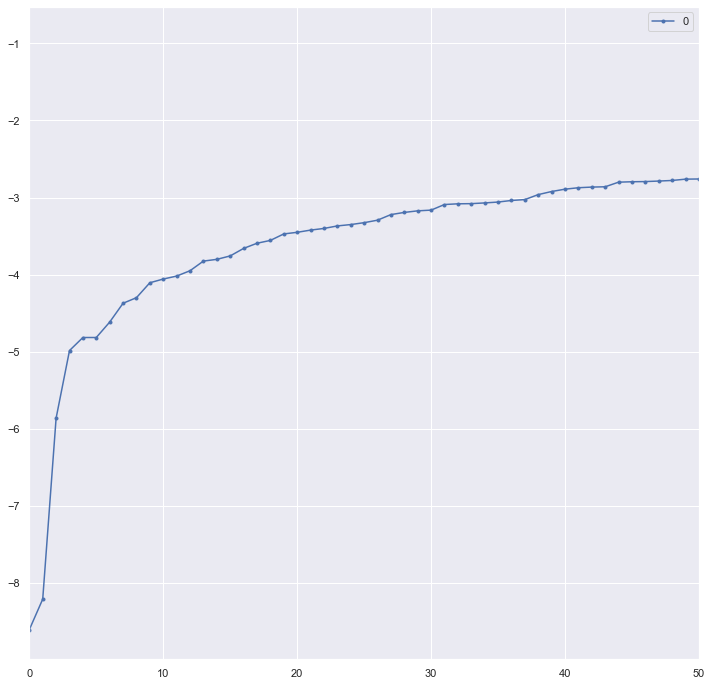

In [47]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-');

In [49]:
thresh = np.sort(df_scores)[3]
thresh

-4.984151747711709

In [51]:
diamond_df[df_scores < thresh]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [53]:
# diamond_df[df_scores < thresh].drop(axis=0, labels=diamond_df[df_scores < thresh].index)

# Missing Values

One of the important issues to consider when working with missing data: **randomness of missing data**.

##  Capturing Missing Values

In [54]:
df = load_titanic_data()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.isnull().values.any()

True

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# data which is not null
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [59]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [60]:
na_columns = [col for col in df.columns if df[col].isnull().sum()>0]
na_columns

['Age', 'Cabin', 'Embarked']

In [61]:
def missing_values(dataframe,na_name=False):
    
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=['n_miss','ratio'])
    
    print(missing_df,end='\n')
    
    if na_name:
        return na_columns

In [62]:
missing_values_titanic = missing_values(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


## Solving the Missing Value Problem

In [63]:
# Basic methods for missing values

df.dropna().shape
df.fillna(0).isnull().sum()
df.fillna(df["Age"].mean()).isnull().sum()
df.fillna(df["Age"].median()).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [67]:
# Only taking the numerical data
dff = df.apply(lambda x : x.fillna(x.mean()) if x.dtype != 'O' else x, axis=0).head()
dff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
dff.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64

In [73]:
df["Embarked"].fillna(df['Embarked'].mode()[0]).isnull().sum()
# df["Embarked"].fillna("missing")

0

In [75]:
# cardinal data and missing value
card_na = df.apply(lambda x : x.fillna(x.mode()) if (x.dtype != 'O' and len(x.unique()) <= 10) else x, axis=0).head()
print(card_na.isnull().sum())
card_na

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Value Assignment in Categorical Variable Breakdown

In [76]:
df.groupby("Sex")["Age"].mean() # women and men age average are different

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [77]:
df["Age"].mean()

29.69911764705882

In [78]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [79]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]
df.loc[(df["Age"].isnull()) & (df["Sex"] == "male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

## Predictive Assignment Process

A good way to modify the text(string) data is to perform **one-hot encoding** or create “**dummy variables**”. The idea is to convert each category into a binary data column by assigning a ***1*** or ***0***. Other options would be to use *LabelEncoder* or *OrdinalEncoder* from Scikit-Learn’s preprocessing package.

In [99]:
# data re-load
df_titanic = load_titanic_data()
cat_columns,num_columns,cat_but_car_columns = grab_column_names(df_titanic)
num_cols = [col for col in num_columns if col not in "PassengerId"] # not choose the cardinal data

# representing categorical columns as numerical columns
# converts a categorical variable into dummy/indicator variables.
dff = pd.get_dummies(df_titanic[cat_columns + num_cols],drop_first = True) 
dff.head()

Observations: 891
Variables: 12
Length of categorical data: 6
Length of numerical data: 3
Length of cardinal data: 3
Length of numerical but categorical data: 4


,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1


## Standardization/Normalization of Variables
Variables are standardized for a variety of reasons, for example, to make sure all variables contribute evenly to a scale when items are added together, or to make it easier to interpret results of a regression or other analysis.

***Min-max*** normalization preserves the relationships among the original data values. The cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of **outliers**.

In [100]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff),columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


### KNN Imputer

This imputer utilizes the **k-Nearest Neighbors** method to replace the missing values in the datasets with the mean value from the parameter *n_neighbors* nearest neighbors found in the training set. By default, it uses a *Euclidean distance metric* to impute the missing values. One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. For example, in our Titanic dataset, the categorical columns ‘Sex’ and ‘Embarked’ have text data.

In [101]:
knn = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(knn.fit_transform(dff),columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [102]:
# Reversing the Imputer

dff = pd.DataFrame(scaler.inverse_transform(dff),columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,0.0,22.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,38.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,26.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,35.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,35.0,8.0500,1.0,0.0,1.0


In [105]:
df_titanic["age_imputed_knn"] = dff[["Age"]]
df_titanic.loc[df_titanic["Age"].isnull(), ["Age","age_imputed_knn"]].head(20)

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600
29,NaN,24.400
31,NaN,29.600
32,NaN,17.600
36,NaN,21.800
42,NaN,28.700


## Examining the Structure of Missing Data

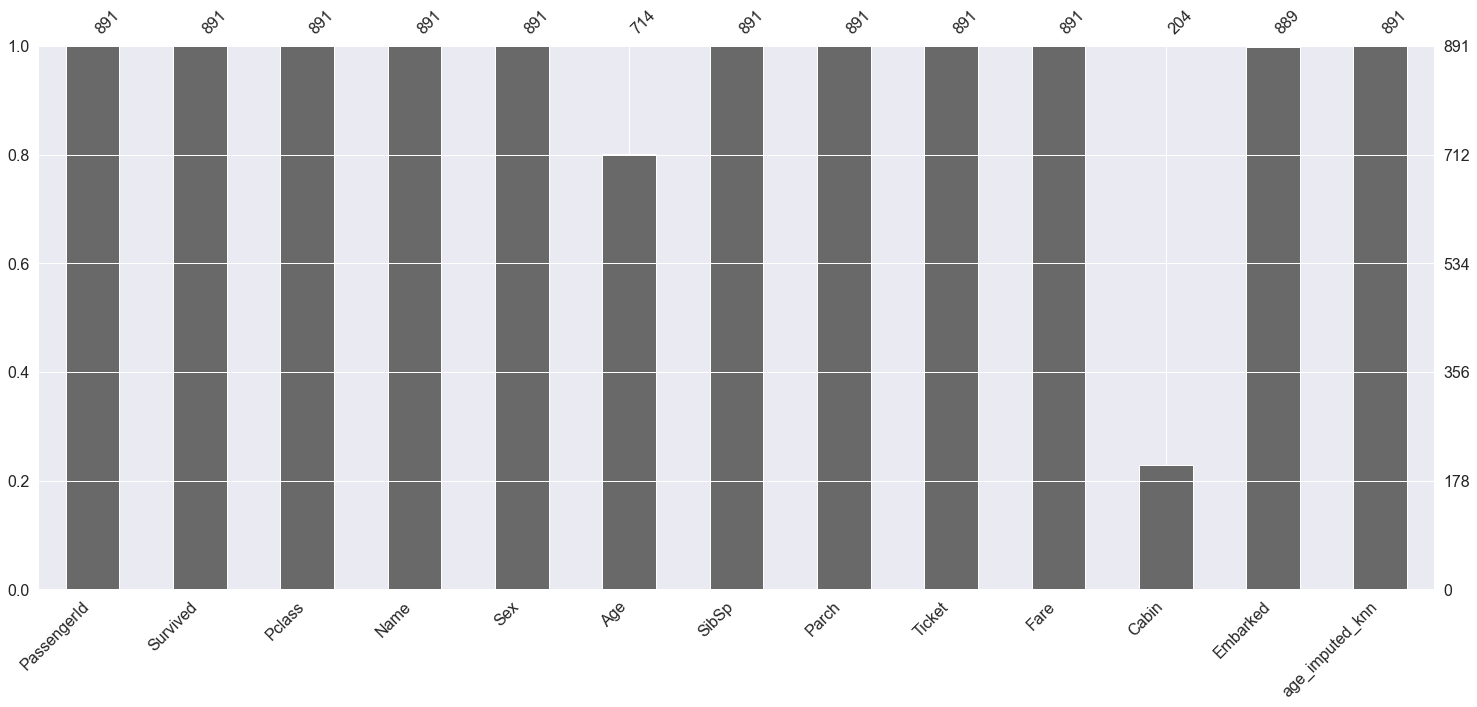

In [107]:
msno.bar(df_titanic);

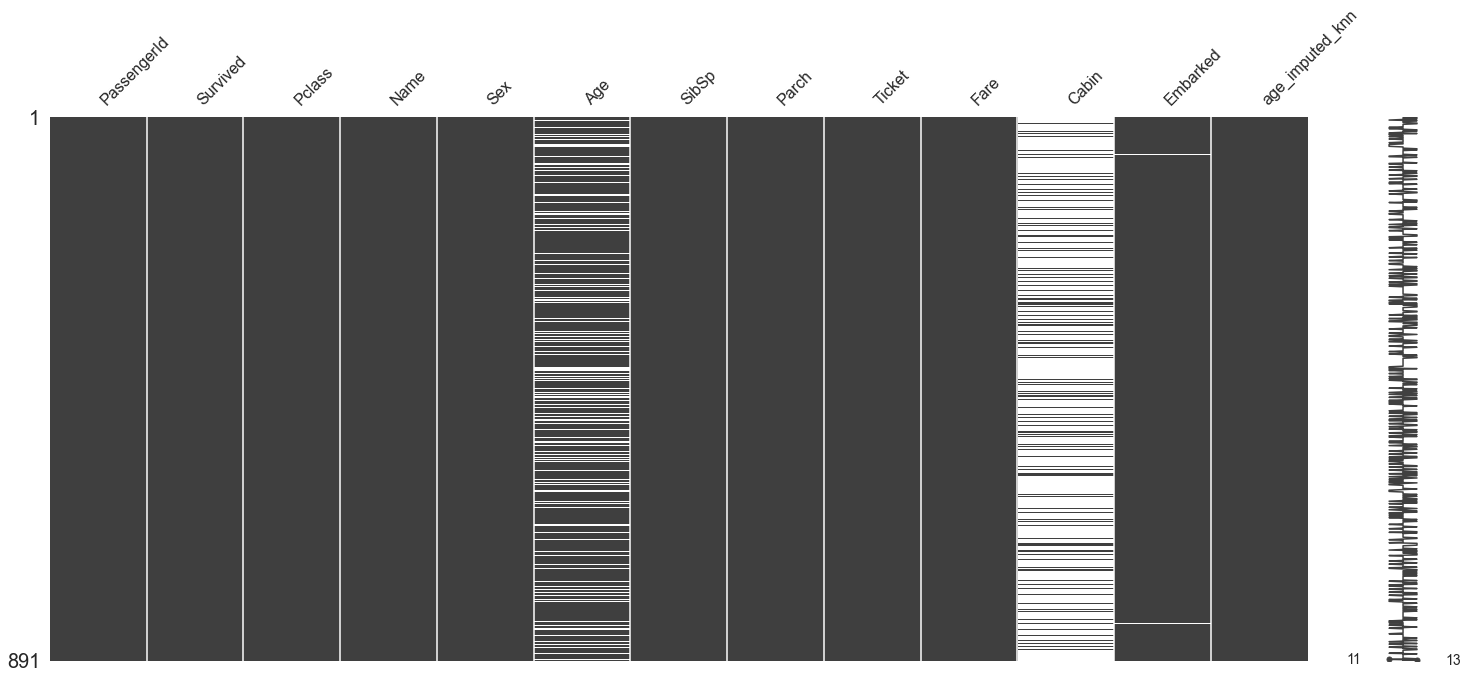

In [109]:
msno.matrix(df_titanic);

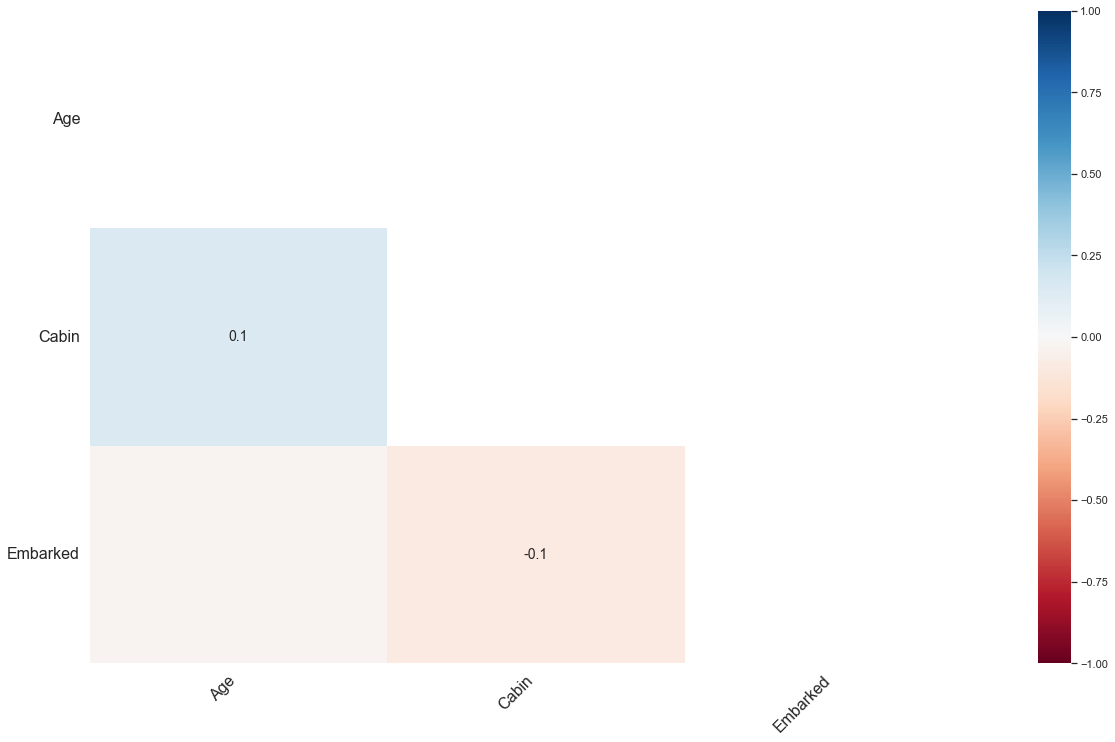

In [111]:
msno.heatmap(df_titanic);

## Analysis of Missing Values with Dependent Variable

In [113]:
na_cols = missing_values(df_titanic,True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [114]:
def missing_values_vs_target(dataframe, target, na_columns):
    
    data = dataframe.copy()
    
    for col in na_columns:
        data[col + "_NA_FLAG"] = np.where(data[col].isnull(),1,0)
        
    na_flags = data.loc[:, data.columns.str.contains("_NA_")].columns
    
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN":data.groupby(col)[target].mean(),
                           "Count":data.groupby(col)[target].count()}),end="\n\n\n")

In [115]:
missing_values_vs_target(df_titanic,"Survived",na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2


